In [45]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("product_revenue.csv")

In [3]:
df.head()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
0,39215.93,614,503,752186,10,10,11990,24306,20498,299
1,23819.47,833,622,425667,8,5,3992,11171,8718,571
2,4415.45,122,101,121878,2,2,1998,6926,6017,6919074
3,57435.56,239,196,609761,2,2,4998,11250,9733,2834
4,0.00,32,22,58488,0,0,0,872,764,1745628


In [4]:
df.describe()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,3679.082174,39.500000,30.347826,48131.826087,1.423913,0.880435,1962.402174,1331.576087,1084.891304,1.380471e+06
std,8120.313959,108.548819,84.138352,107360.991406,2.219958,1.546655,3526.679144,2951.472183,2483.228479,1.026994e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,225.000000,2.990000e+02
25%,0.000000,7.750000,6.000000,11947.500000,0.000000,0.000000,0.000000,601.000000,472.250000,6.868305e+05
50%,1166.320000,15.000000,12.000000,22673.000000,0.000000,0.000000,0.000000,766.000000,614.500000,1.224656e+06
75%,3639.675000,29.000000,22.250000,46529.500000,2.000000,1.250000,2153.500000,905.000000,746.750000,1.746880e+06
max,57435.560000,833.000000,622.000000,752186.000000,10.000000,10.000000,15960.000000,24306.000000,20498.000000,6.919074e+06


In [5]:
lm = LinearRegression()

In [40]:
y1 = df.yitemrevenue
feature_cols =["xcartadd","xcartuniqadd","xcartaddtotalrs","xcartremove","xcardtremovetotal","xcardtremovetotalrs","xproductviews","xuniqprodview","xprodviewinrs"] 
x1 = df[feature_cols]

In [41]:
y2 = df2.yitemrevenue
feature_cols =["xcartadd","xcartuniqadd","xcartaddtotalrs","xcartremove","xcardtremovetotal","xcardtremovetotalrs","xproductviews","xuniqprodview","xprodviewinrs"] 
x2 = df2[feature_cols]

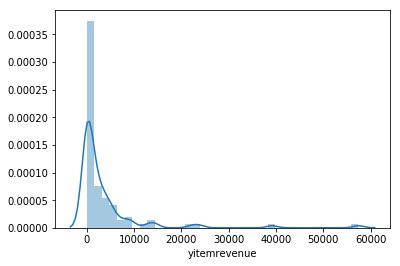

In [17]:
sns.distplot(y)

In [42]:
lm.fit(x1,y1)
lm.score(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lm.fit(x2,y2)
lm.score(x2,y2)

0.3488230247449374

In [28]:
df2 = df[df['yitemrevenue'] < 10000]


In [34]:
lm1 = smf.ols(formula='yitemrevenue~xcartadd+xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xproductviews+xuniqprodview+xprodviewinrs', data=df).fit()
lm2 = smf.ols(formula='yitemrevenue~xcartadd+xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xproductviews+xuniqprodview+xprodviewinrs', data=df2).fit()


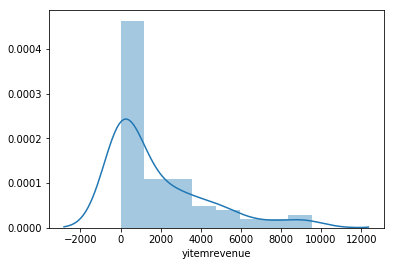

In [26]:
y2 = df2.yitemrevenue
sns.distplot(y2)

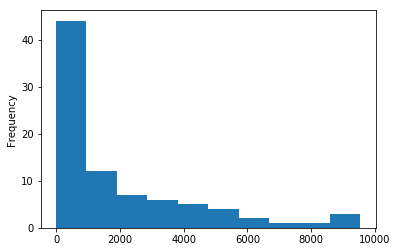

In [29]:
df2['yitemrevenue'].plot.hist()

In [33]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     31.33
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           5.57e-23
Time:                        10:26:54   Log-Likelihood:                -889.68
No. Observations:                  92   AIC:                             1799.
Df Residuals:                      82   BIC:                             1825.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -355.5869    946.178     -0.376      0.708   -2237.836    1526.662
xcartadd               89.5503    115.743      0.774      0.441    -140.700     319.801
xcartuniqadd         -161.1280    158.434     -1.017      0.312    -476.303     154.047
xcartaddtotalrs         0.1013      0.013      7.549      0.000       0.075       0.128
xcartremove           597.7659    528.214      1.132      0.261    -453.021    1648.553
xcardtremovetotal   -1096.0898    796.820     -1.376      0.173   -2681.219     489.039
xcardtremovetotalrs    -0.2914      0.267     -1.090      0.279      -0.823       0.240
xproductviews           6.7968     10.047      0.676      0.501     -13.190      26.784
xuniqprodview          -7.9396     11.417     -0.695      0.489     -30.651      14.772
xprodviewinrs           0.0005      0.000      1.159      0.250      -0.000       0.001
==============================================================================
Omnibus:                       53.835   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.068
Skew:                           1.714   Prob(JB):                     1.04e-68
Kurtosis:                      11.362   Cond. No.                     4.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     4.464
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           0.000105
Time:                        10:27:35   Log-Likelihood:                -764.84
No. Observations:                  85   AIC:                             1550.
Df Residuals:                      75   BIC:                             1574.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -753.6595    517.191     -1.457      0.149   -1783.957     276.638
xcartadd               28.9504     76.830      0.377      0.707    -124.103     182.004
xcartuniqadd          -24.0469     97.013     -0.248      0.805    -217.307     169.213
xcartaddtotalrs         0.0001      0.018      0.006      0.995      -0.036       0.036
xcartremove          -116.5904    318.481     -0.366      0.715    -751.038     517.857
xcardtremovetotal    -112.0325    425.892     -0.263      0.793    -960.453     736.388
xcardtremovetotalrs    -0.0074      0.163     -0.046      0.964      -0.332       0.317
xproductviews          21.8723      6.259      3.495      0.001       9.404      34.341
xuniqprodview         -25.3633      7.004     -3.621      0.001     -39.315     -11.411
xprodviewinrs           0.0010      0.001      1.774      0.080      -0.000       0.002
==============================================================================
Omnibus:                        5.752   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.798
Skew:                           0.635   Prob(JB):                       0.0551
Kurtosis:                       2.844   Cond. No.                     3.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
[variance_inflation_factor(x1.values,j) for j in range(x1.shape[1])]

[986.9648194827269,
 1099.408238595855,
 12.576879515361144,
 9.371063354874545,
 11.045563787524536,
 5.998501250562755,
 4792.51411243084,
 4315.48683108868,
 1.9646034681151185]

### Hilangkan VIF yang sangat besar karena mengakibatkan nilai R square tidak valid

In [53]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,5.350356,yitemrevenue
1,993.952178,xcartadd
2,1112.400810,xcartuniqadd
3,21.866474,xcartaddtotalrs
4,9.501167,xcartremove
5,11.289921,xcardtremovetotal
6,6.075636,xcardtremovetotalrs
7,4811.525457,xproductviews
8,4333.857179,xuniqprodview
9,2.001208,xprodviewinrs


In [51]:
lm3 = smf.ols(formula='yitemrevenue~xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xprodviewinrs', data=df).fit()

In [52]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.14
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           7.32e-25
Time:                        10:38:33   Log-Likelihood:                -893.44
No. Observations:                  92   AIC:                             1799.
Df Residuals:                      86   BIC:                             1814.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             429.4346    841.241      0.510      0.611   -1242.896    2101.766
xcartaddtotalrs         0.0753      0.005     13.884      0.000       0.064       0.086
xcartremove           111.2443    481.439      0.231      0.818    -845.824    1068.313
xcardtremovetotal   -1305.7331    712.962     -1.831      0.071   -2723.055     111.589
xcardtremovetotalrs     0.0235      0.221      0.106      0.916      -0.416       0.463
xprodviewinrs           0.0004      0.000      0.906      0.367      -0.000       0.001
==============================================================================
Omnibus:                       57.367   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.101
Skew:                           1.940   Prob(JB):                     1.01e-63
Kurtosis:                      10.786   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
df_new = df[['yitemrevenue','xcartaddtotalrs','xcartremove','xcardtremovetotal','xcardtremovetotalrs','xprodviewinrs']]

In [68]:
vif_new = pd.DataFrame()
vif_new["VIF Factor"] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]
vif_new["features"] = df_new.columns
vif_new

,VIF Factor,features
0,4.923599,yitemrevenue
1,7.037110,xcartaddtotalrs
2,7.668643,xcartremove
3,8.919883,xcardtremovetotal
4,4.034046,xcardtremovetotalrs
5,1.350075,xprodviewinrs


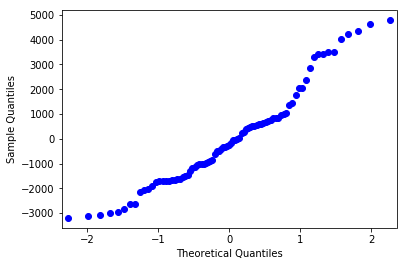

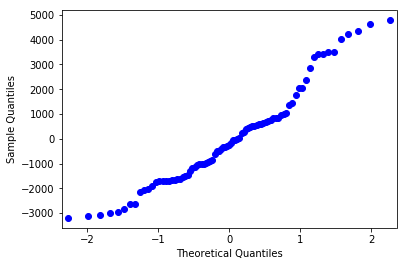

In [58]:
from scipy import stats
stats.shapiro(lm3.resid)
sm.qqplot(lm2.resid)

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_scaler = df_new.drop(['yitemrevenue'],axis=1)
scaler = StandardScaler()
scaler.fit(df_scaler[['xcartaddtotalrs','xcartremove','xcardtremovetotal','xcardtremovetotalrs','xprodviewinrs']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
print(scaler.mean_)
df_scaler = scaler.transform(df_scaler)

[4.81318261e+04 1.42391304e+00 8.80434783e-01 1.96240217e+03
 1.38047095e+06]


In [85]:
df_new

,yitemrevenue,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xprodviewinrs
0,39215.93,752186,10,10,11990,299
1,23819.47,425667,8,5,3992,571
2,4415.45,121878,2,2,1998,6919074
3,57435.56,609761,2,2,4998,2834
4,0.00,58488,0,0,0,1745628
5,9181.90,63121,2,1,1598,1281213
6,4135.44,35857,0,0,0,1685285
7,8906.24,104078,4,3,5036,1554466
8,12722.89,95521,0,0,0,1474786
9,0.00,19770,0,0,0,2081844


In [90]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()


xdf = df.drop(['xcartadd','xcartuniqadd','xproductviews','xuniqprodview','yitemrevenue'],1)
scaler1.fit(xdf)
st_xdf = scaler1.transform(xdf)

ynewdf = df_new['yitemrevenue']
ynewdf = pd.DataFrame(ynewdf)
scaler = StandardScaler()
scaler.fit(xdf)
xnewdf = pd.DataFrame(scaler.transform(xdf),index=xdf.index, columns=xdf.columns)
newdf = pd.concat([ynewdf, xnewdf], axis=1)
newdf.head()

,yitemrevenue,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xprodviewinrs
0,39215.93,6.593755,3.884344,5.928625,2.858934,-1.351259
1,23819.47,3.535771,2.978489,2.678128,0.578652,-1.350993
2,4415.45,0.690663,0.260925,0.727829,0.010149,5.422577
3,57435.56,5.259886,0.260925,0.727829,0.865469,-1.348777
4,0.00,0.096990,-0.644929,-0.572370,-0.559494,0.357508


In [89]:
vif_new1 = pd.DataFrame()
vif_new1["VIF Factor"] = [variance_inflation_factor(newdf.values, i) for i in range(newdf.shape[1])]
vif_new1["features"] = newdf.columns
vif_new1

,VIF Factor,features
0,2.671277,yitemrevenue
1,3.996616,xcartaddtotalrs
2,6.094935,xcartremove
3,6.622743,xcardtremovetotal
4,3.247032,xcardtremovetotalrs
5,1.184699,xprodviewinrs


In [91]:
lm4 = smf.ols(formula='yitemrevenue~xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xprodviewinrs', data=newdf).fit()

In [92]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.14
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           7.32e-25
Time:                        11:13:43   Log-Likelihood:                -893.44
No. Observations:                  92   AIC:                             1799.
Df Residuals:                      86   BIC:                             1814.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3679.0822    430.627      8.544      0.000    2823.025    4535.140
xcartaddtotalrs      8035.6703    578.789     13.884      0.000    6885.075    9186.265
xcartremove           245.6119   1062.949      0.231      0.818   -1867.461    2358.685
xcardtremovetotal   -2008.5125   1096.697     -1.831      0.071   -4188.674     171.649
xcardtremovetotalrs    82.3062    775.941      0.106      0.916   -1460.214    1624.826
xprodviewinrs         423.6134    467.505      0.906      0.367    -505.756    1352.983
==============================================================================
Omnibus:                       57.367   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.101
Skew:                           1.940   Prob(JB):                     1.01e-63
Kurtosis:                      10.786   Cond. No.                         5.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
from pyearth import Earth

In [96]:
model = Earth()

In [98]:
model.fit(x1,y1)

C:\Users\nourma059258\AppData\Local\Continuum\miniconda2\envs\py36\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\nourma059258\AppData\Local\Continuum\miniconda2\envs\py36\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [102]:
print(model.summary())
print(model.trace())

Earth Model
--------------------------------------------------
Basis Function               Pruned  Coefficient  
--------------------------------------------------
(Intercept)                  No      -1670.14     
xcartaddtotalrs              Yes     None         
h(xcardtremovetotal-3)       Yes     None         
h(3-xcardtremovetotal)       Yes     None         
h(xcartaddtotalrs-46987)     Yes     None         
h(46987-xcartaddtotalrs)     Yes     None         
h(xproductviews-1115)        No      -12.1955     
h(1115-xproductviews)        Yes     None         
xprodviewinrs                Yes     None         
xcardtremovetotalrs          Yes     None         
xproductviews                Yes     None         
h(xcartaddtotalrs-70676)     No      0.160767     
h(70676-xcartaddtotalrs)     Yes     None         
xuniqprodview                Yes     None         
h(xcardtremovetotalrs-4598)  Yes     None         
h(4598-xcardtremovetotalrs)  No      0.563219     
h(xprodviewinrs-1.1